In [ ]:
import cv2 as cv
import sys

img=cv.imread('./opencv_data/soccer.jpg')   # 이미지 불러옴
  
if img is None:
    sys.exit('파일을 찾을 수 없습니다.')
    
cv.imshow('original_RGB',img)               # 원본 이미지 출력
cv.imshow('Upper left half',img[0:img.shape[0]//2,0:img.shape[1]//2,:])
# cv.imshow('botten', img[img.shape[0]//2,img.shape[1]//2,:])
cv.imshow('Center half',img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4,:])

cv.imshow('R channel',img[:,:,2])
cv.imshow('G channel',img[:,:,1])
cv.imshow('B channel',img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

In [1]:
# 위 예제를 통해서 우측하단 반 이미지를 출력
img.shape[1]//2

NameError: name 'img' is not defined

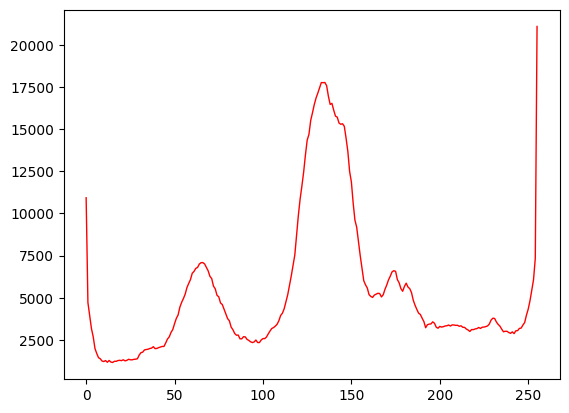

In [3]:
# 이진화
# 영상 이미지를 흑백 영상으로 변환하여 처리
# 임계값을 기준으로 흑(0)과 백(1)을 결정
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('./opencv_data/soccer.jpg') 
h=cv.calcHist([img],[2],None,[256],[0,256]) # 0,1,2번 채널 중에 2번인 R 채널의 히스토그램 구함
plt.plot(h,color='r',linewidth=1)

In [10]:
import cv2 as cv
import sys

img=cv.imread('./opencv_data/soccer.jpg') 
            
t,bin_img=cv.threshold(img[:,:,2],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임곗값=',t)

cv.imshow('R channel',img[:,:,2])			# R 채널 영상
cv.imshow('R channel binarization',bin_img)	# R 채널 이진화 영상

cv.waitKey()
cv.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임곗값= 113.0


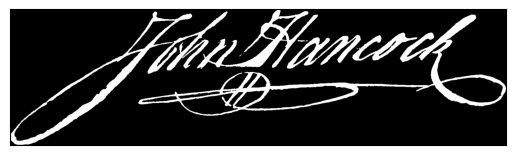

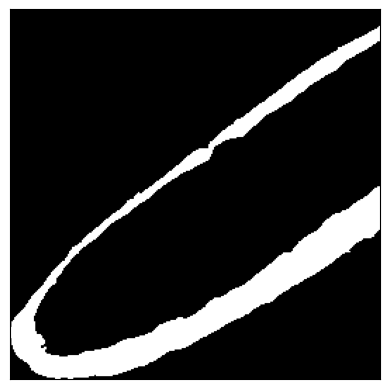

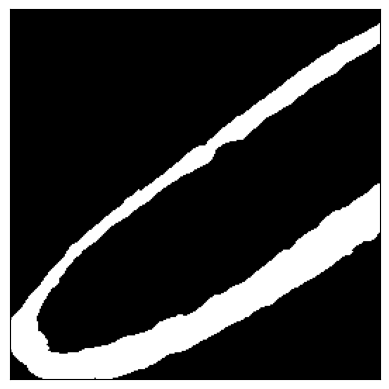

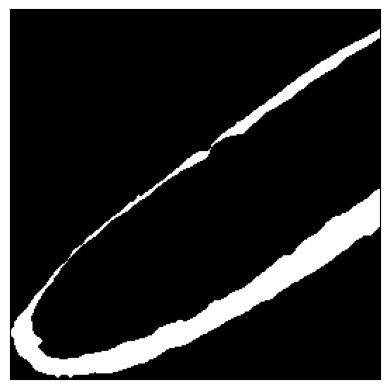

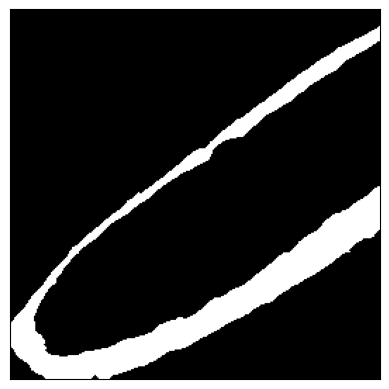

In [ ]:
# 모노폴리지
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('./opencv_data/JohnHancocksSignature.png',cv.IMREAD_UNCHANGED) 

t,bin_img=cv.threshold(img[:,:,3],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show() 

b = bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

se = np.uint8([[0,0,1,0,0],         # 구조 요소
            [0,1,1,1,0],
            [1,1,1,1,1],
            [0,1,1,1,0],
            [0,0,1,0,0]])

b_dilation=cv.dilate(b,se,iterations=1)   # 팽창, b는 부분이미지, se 구조 요소
plt.imshow(b_dilation,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion=cv.erode(b,se,iterations=1)   # 침식
plt.imshow(b_erosion,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_closing=cv.erode(cv.dilate(b,se,iterations=1),se,iterations=1)   # 닫기
plt.imshow(b_closing,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# 감마보정 실험
import cv2 as cv
import numpy as np

img=cv.imread('./opencv_data/soccer.jpg') 
img=cv.resize(img,dsize=(0,0),fx=0.25,fy=0.25) # 영상 크기 1/4로 축소

def gamma(f,gamma=1.0):
    f1=f/255.0         # L=256이라고 가정
    return np.uint8(255*(f1**gamma))

gc=np.hstack((gamma(img,0.5),gamma(img,0.75),gamma(img,1.0),gamma(img,2.0),gamma(img,3.0)))
cv.imshow('gamma',gc)

cv.waitKey()
cv.destroyAllWindows()

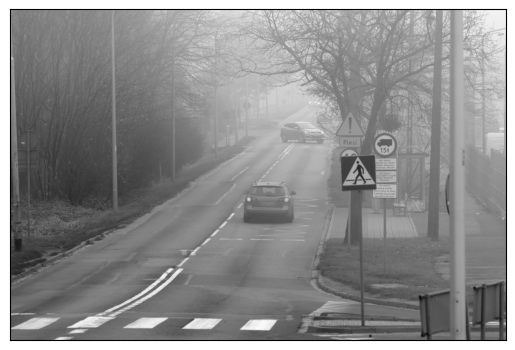

(912, 1368)


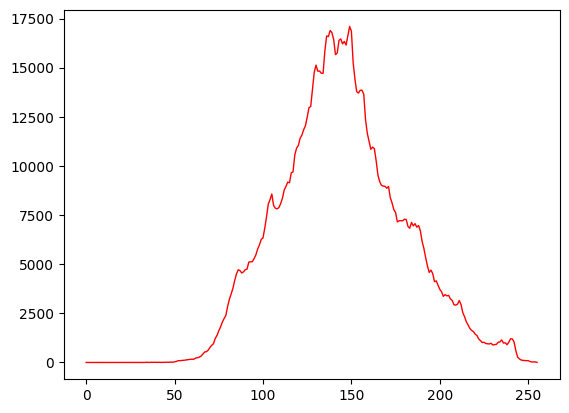

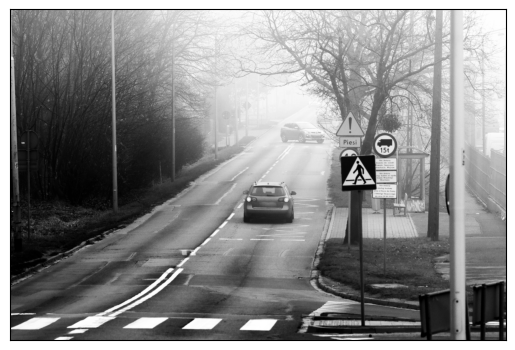

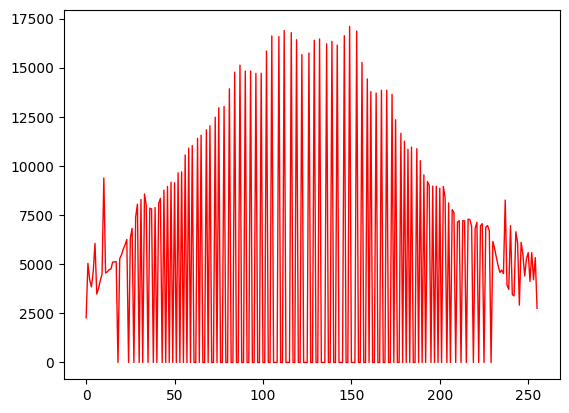

([<matplotlib.lines.Line2D at 0x2c42675fa40>], None)

In [18]:
# 히스토그램 평활화하기

import cv2 as cv
import matplotlib.pyplot as plt
# 이미지 읽기
img=cv.imread('./opencv_data/mistyroad.jpg') 
# 이미지를 Gray로 변환
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)      # 명암 영상으로 변환하고 출력
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()
print(gray.shape)
h=cv.calcHist([gray],[0],None,[256],[0,256])   # 히스토그램을 구해 출력 - 명암
plt.plot(h,color='r',linewidth=1), plt.show()

equal=cv.equalizeHist(gray)         # 히스토그램을 평활화하고 출력 - equalizeHist()
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([equal],[0],None,[256],[0,256])   # 히스토그램을 구해 출력
plt.plot(h,color='r',linewidth=1), plt.show()

In [8]:
# 컨볼루션 적용 (가우시안 스무딩과 엠보싱)하기

import cv2 as cv
import numpy as np

img = cv.imread('./opencv_data/soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx = 0.4, fy = 0.4)
print('축소된 이미지 사이즈', img.shape)
# gray로 변환

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print('gray 이미지 사이즈', gray.shape)

# 텍스트 추가
cv.putText(gray, 'soccer', (10,20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
cv.imshow('Original', gray)

# smooth 작업 (가우시안)
smooth = np.hstack((cv.GaussianBlur(gray, (5,5), 0.0),
                    cv.GaussianBlur(gray, (9,9), 0.0),
                    cv.GaussianBlur(gray, (15,15), 0.0)
                    ))
cv.imshow('Smooth', smooth)

# 엠보싱 필터
femboss = np.array([[-1.0, 0.0, 0.0],
                    [ 0.0, 0.0, 0.0],
                    [ 0.0, 0.0, 1.0]])

print('변환전 : ',type(gray[0][0]))
gray16 = np.int16(gray)
print('변환후 : ',type(gray16[0][0]))
# 계산 후 다시 uint8로 변환
emboss = np.uint8(np.clip(cv.filter2D(gray16, -1, femboss)+128, 0, 255)) # 0 ~ 255 사이로 변환
emboss_bad = np.uint8(cv.filter2D(gray16, -1, femboss)+128)
emboss_worse = cv.filter2D(gray, -1, femboss)

cv.imshow('Emboss', emboss)
cv.imshow('Emboss_bad', emboss_bad)
cv.imshow('Emboss_worse', emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

축소된 이미지 사이즈 (379, 574, 3)
gray 이미지 사이즈 (379, 574)
변환전 :  <class 'numpy.uint8'>
변환후 :  <class 'numpy.int16'>


In [10]:
# 보간을 이용해 영상의 기하 변환하기


import cv2 as cv

img=cv.imread('./opencv_data/rose.png')
# 일부 이미지 불러오기 위해서 영역지정
patch=img[250:350,170:270,:]

# 사각형이고, 패치부분을 가리킴
img=cv.rectangle(img,(170,250),(270,350),(255,0,0),3)
# 사이즈 조절
# 최근접 이웃 보간법
patch1=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_NEAREST)
# 양산형 보간법
patch2=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_LINEAR)
# 양3차 보간법
patch3=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_CUBIC)

cv.imshow('Original',img)
cv.imshow('Resize nearest',patch1) 
cv.imshow('Resize bilinear',patch2) 
cv.imshow('Resize bicubic',patch3) 

cv.waitKey()
cv.destroyAllWindows()


In [ ]:
# 직접 작성한 함수와 OpenCV가 제공하는 함수의 시간 비교하기
import cv2 as cv
import numpy as np
import time

def my_cvtGray1(bgr_img):
    g=np.zeros([bgr_img.shape[0],bgr_img.shape[1]])
    for r in range(bgr_img.shape[0]):
        for c in range(bgr_img.shape[1]):
            g[r,c]=0.114*bgr_img[r,c,0]+0.587*bgr_img[r,c,1]+0.299*bgr_img[r,c,2]
    return np.uint8(g)

def my_cvtGray2(bgr_img):
    g=np.zeros([bgr_img.shape[0],bgr_img.shape[1]])
    g=0.114*bgr_img[:,:,0]+0.587*bgr_img[:,:,1]+0.299*bgr_img[:,:,2]
    return np.uint8(g)
    
img=cv.imread('./opencv_data/girl_laughing.jpg')

start=time.time()
my_cvtGray1(img)
print('My time1:',time.time()-start)

start=time.time()
my_cvtGray2(img)
print('My time2:',time.time()-start)

start=time.time()
cv.cvtColor(img,cv.COLOR_BGR2GRAY)
print('OpenCV time:',time.time()-start)
# cv.imshow('aaa',img)

# cv.waitKey()
# cv.destroyAllWindows()

My time1: 5.8249828815460205
My time2: 0.017002582550048828
OpenCV time: 0.0009679794311523438
